In [1]:
# import all dependecies
import os
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from matplotlib import pyplot as plt 
import numpy as np 

In [2]:
# Dataset acquisition
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.mnist.load_data()

print(y_train_raw[0])
print(x_train_raw.shape, y_train_raw.shape)
print(x_test_raw.shape, y_test_raw.shape)

5
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
'''
    Convert label into one hot code
    Goal --> to make probabilities calculation run indepently
'''

num_class = 10

y_train = keras.utils.to_categorical(y_train_raw, num_class)
y_test = keras.utils.to_categorical(y_test_raw, num_class)

# print the first data label
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


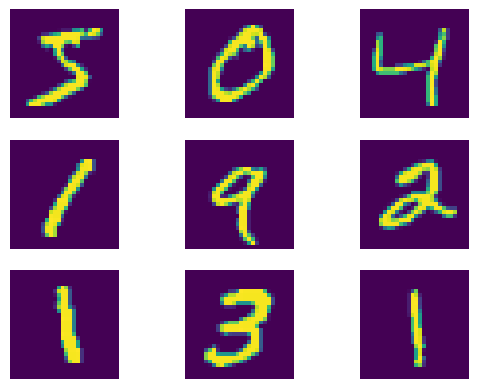

In [4]:
# dataset visualization using matplotlib

plt.figure()
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train_raw[i])
    plt.axis("off")
plt.show()

In [5]:
# reshape image matrix into 1 vector
x_train = x_train_raw.reshape(60000, 784)
x_test = x_test_raw.reshape(10000, 784)

In [6]:
# normalize image pixel into range 0 - 1
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [7]:
# build DNN Model
model = keras.Sequential([
    layers.Dense(512, activation="relu", input_dim = 784), # input layer
    layers.Dense(256, activation="relu"), # hidden layer
    layers.Dense(124, activation="relu"), # hidden layer
    layers.Dense(num_class, activation="softmax") # output layer
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 124)               31868     
                                                                 
 dense_3 (Dense)             (None, 10)                1250      
                                                                 
Total params: 566,366
Trainable params: 566,366
Non-trainable params: 0
_________________________________________________________________


In [8]:
# Compile The Model
model.compile(
    loss = keras.losses.categorical_crossentropy,
    optimizer = optimizers.Adam(0.001),
    metrics = ["accuracy"]
)

In [9]:
# Fit the model
model.fit(
    x_train,
    y_train,
    batch_size = 128,
    epochs = 10,
    verbose = 1
)

Epoch 1/10
469/469 [==============================] - 3s 3ms/step - loss: 0.2247 - accuracy: 0.9343
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0839 - accuracy: 0.9734
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0574 - accuracy: 0.9814
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0378 - accuracy: 0.9879
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0313 - accuracy: 0.9902
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0236 - accuracy: 0.9927
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0220 - accuracy: 0.9929
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0215 - accuracy: 0.9928
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0154 - accuracy: 0.9952
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0143 - accuracy: 0.9951

In [10]:
# Evaluate model
score = model.evaluate(x_test, y_test, verbose = 1)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0717 - accuracy: 0.9826
Test loss:  0.07173199951648712
Test accuracy:  0.9825999736785889


In [11]:
# Save Weight
model.save("final_DNN.h5")

## Build CNN Model

In [12]:
# Import all dependencies
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
import numpy as np 

In [13]:
# Build Model Layers
model = tf.keras.Sequential()

# First Block Layer
model.add(Conv2D(
    filters = 32,
    kernel_size = 5,
    strides = (1, 1),
    padding = "same",
    activation = "relu", 
    input_shape = (28, 28, 1)
))

model.add(MaxPooling2D(
    pool_size = (2, 2),
    strides = (2, 2),
    padding = "valid"
))

# Second Block Layer
model.add(Conv2D(
    filters = 64,
    kernel_size = 3,
    strides = (1, 1),
    padding = "same",
    activation = "relu"
))

model.add(MaxPooling2D(
    pool_size = (2, 2),
    strides = (2, 2),
    padding = "valid"
))

# Add Dropout Regularization 
model.add(Dropout(0.25))

# Flatten 
model.add(Flatten())

# Add fully connected layer
model.add(Dense(
    units = 128,
    activation = "relu"
))

model.add(Dropout(0.5))

model.add(Dense(
    units = 10,
    activation = "softmax"
))


In [14]:
# Reshape data dimension
X_train = x_train.reshape(60000, 28, 28, 1)
X_test = x_test.reshape(10000, 28, 28, 1)

In [15]:
# Compile the model
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [16]:
# Fit the model
model.fit(
    x = X_train,
    y = y_train,
    epochs = 5,
    batch_size = 128
)

Epoch 1/5
469/469 [==============================] - 8s 8ms/step - loss: 0.2902 - accuracy: 0.9083
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0953 - accuracy: 0.9709
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0738 - accuracy: 0.9780
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0599 - accuracy: 0.9820
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0511 - accuracy: 0.9843


In [17]:
# Evaluate CNN Model
test_loss, test_acc = model.evaluate(x = X_test, y = y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
313/313 [==============================] - 1s 3ms/step - loss: 0.0235 - accuracy: 0.9916
Test loss: 0.023525545373558998
Test accuracy: 0.991599977016449


In [18]:
# save the model
model.save("final_CNN_model.h5")

In [19]:
# Load model and predict
from tensorflow.keras.models import load_model
new_model = load_model("final_CNN_model.h5")
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)             

In [32]:
# visualize prediction results
def res_Visual(total_prediction):
    final_opt_a = new_model.predict(X_test[0:total_prediction])
    final_opt_a = final_opt_a.argmax(axis=-1)
    fig, ax = plt.subplots(nrows=int(total_prediction/5), ncols=5)
    ax = ax.flatten()
    print("Prediction results of the first {} images: ".format(total_prediction))
    for i in range(total_prediction):
        print(final_opt_a[i], end = ",")
        if int((i + 1) % 5) == 0:
            print("\t")

        # visualize image display 
        img = X_test[i].reshape((28, 28))
        plt.axis("off")
        ax[i].imshow(img, cmap = "Greys", interpolation = "nearest") # Visualization
        ax[i].axis("off")
    print("first {} images in the test set: ".format(total_prediction))

1/1 [==============================] - 0s 20ms/step
Prediction results of the first 20 images: 
7,2,1,0,4,	
1,4,9,5,9,	
0,6,9,0,1,	
5,9,7,8,4,	
first 20 images in the test set: 


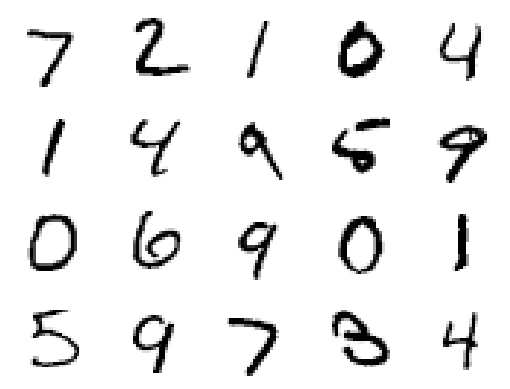

In [33]:
# call the procedur
res_Visual(20)